# Capstone Project 
## Part 1 - Predicting Airbnb rental prices

## Exploratory Data Analysis - Word Clouds

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1.5)

In [3]:
# load data
df = pd.read_csv('../GA/capstone-data-airbnb/dec20-data/active_listings_clean.csv', index_col=0)
df.shape

(20994, 42)

### Create London mask to use for word clouds 

In [7]:
london_mask = np.array(Image.open('../GA/capstone-data-airbnb/presentation/london_outline_green.png'))

In [9]:
# transform mask to correct format
def transform_format(val):
    if val == 1:
        return 255   
    else:
        return val

transformed_london_mask = np.ndarray((london_mask.shape[0], london_mask.shape[1]), np.int32)

for i in range(len(london_mask)):
    transformed_london_mask[i] = list(map(transform_format, london_mask[i]))

### Amenities word cloud

In [10]:
# use CountVectorizer to inspect the words in the amenities column
cvec = CountVectorizer(token_pattern='(?u)[a-zA-Z][a-z ]+',
                       ngram_range=(1,1),
                       min_df=10)
cmat = cvec.fit_transform(df.amenities)

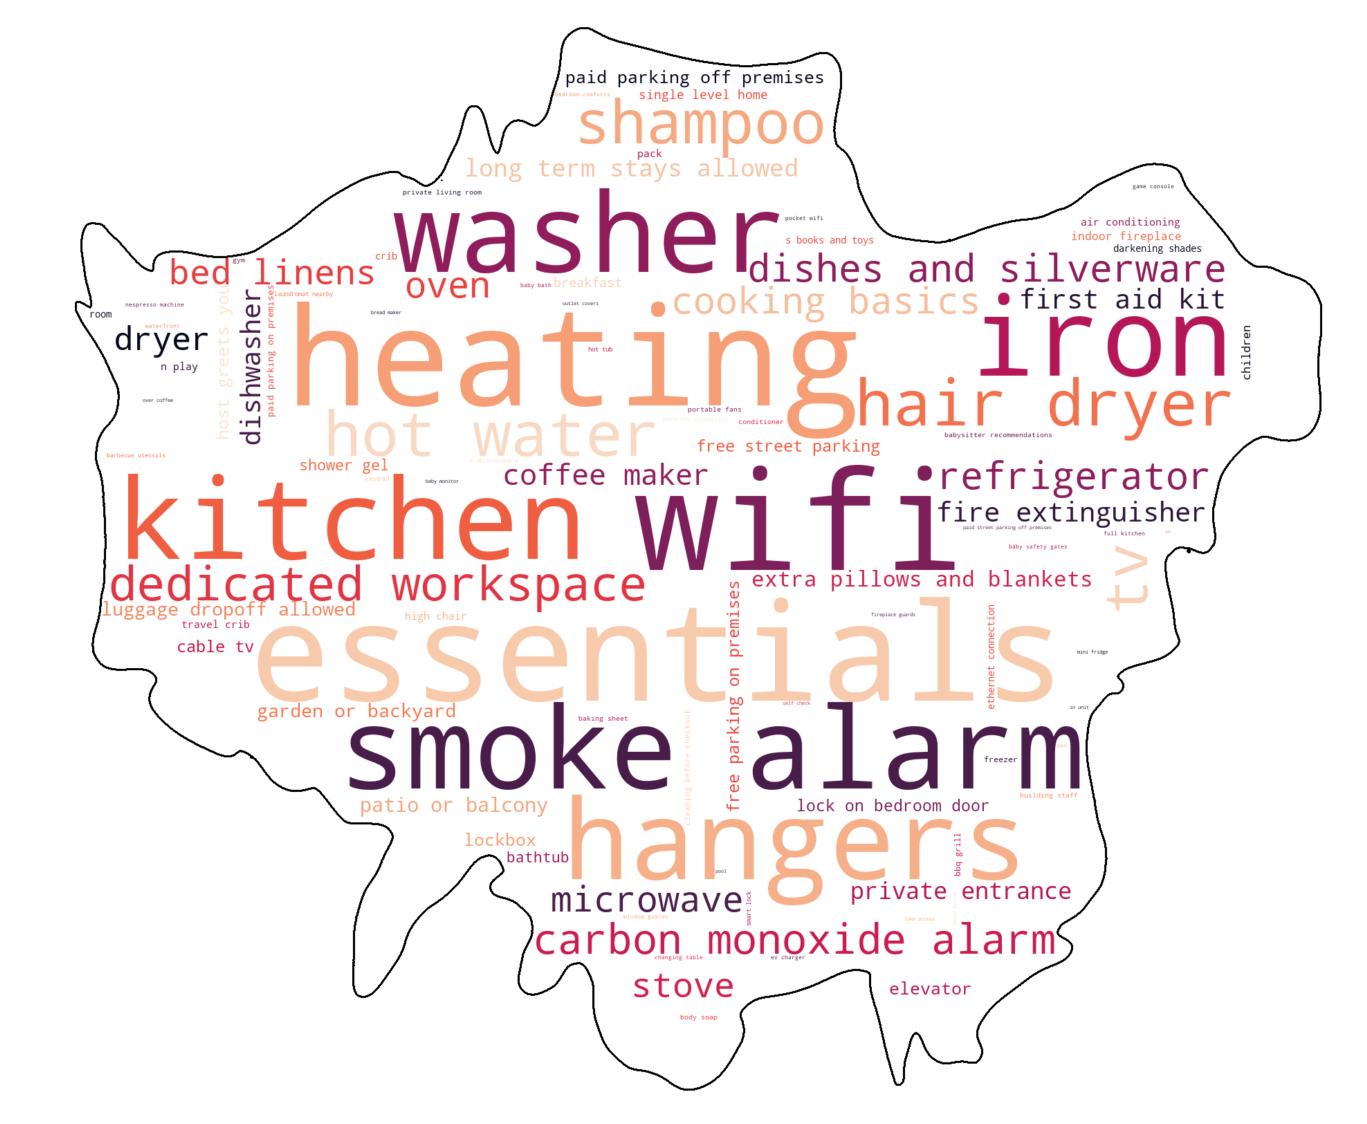

In [11]:
# create dictionary of word counts and frequencies
frequencies = dict(zip(cvec.get_feature_names(), np.array(cmat.sum(axis=0))[0]))

# create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color='white', mask=transformed_london_mask,
                      random_state=6, contour_width=3, contour_color='black', colormap='rocket').fit_words(frequencies)

# display the generated image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Listing name word cloud

In [14]:
df.name.replace(np.nan, '', inplace=True)

In [16]:
# use TfidfVectorizer to inspect the words in the name column
tvec = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2))
tmat = tvec.fit_transform(df.name)

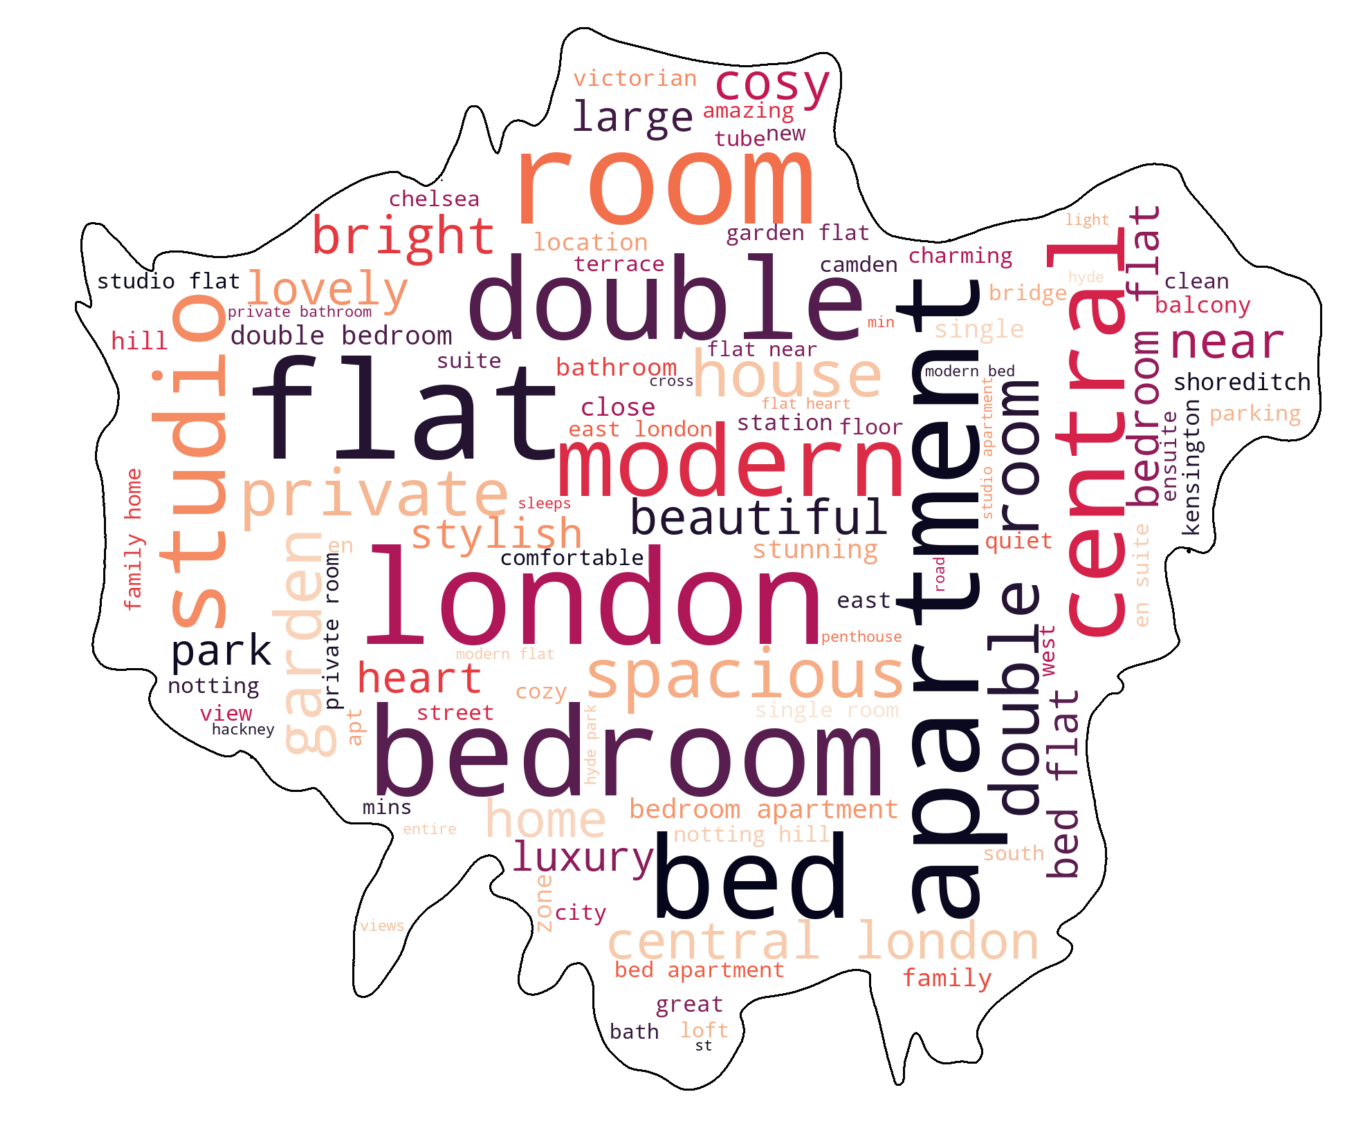

In [17]:
# create dictionary of word counts and frequencies
frequencies = dict(zip(tvec.get_feature_names(), np.array(tmat.sum(axis=0))[0]))

# create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color='white', mask=transformed_london_mask,
                      random_state=1, contour_width=3, contour_color='black', colormap='rocket').fit_words(frequencies)

# display the generated image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Listing description word cloud

In [18]:
df.description.replace(np.nan, '', inplace=True)

In [20]:
from sklearn.feature_extraction import text
additional_words = ['br']
my_stop_words = text.ENGLISH_STOP_WORDS.union(additional_words)

In [21]:
# use TfidfVectorizer to inspect the words in the description column
tvec = TfidfVectorizer(stop_words=my_stop_words,
                       ngram_range=(2,2))
tmat = tvec.fit_transform(df.description)

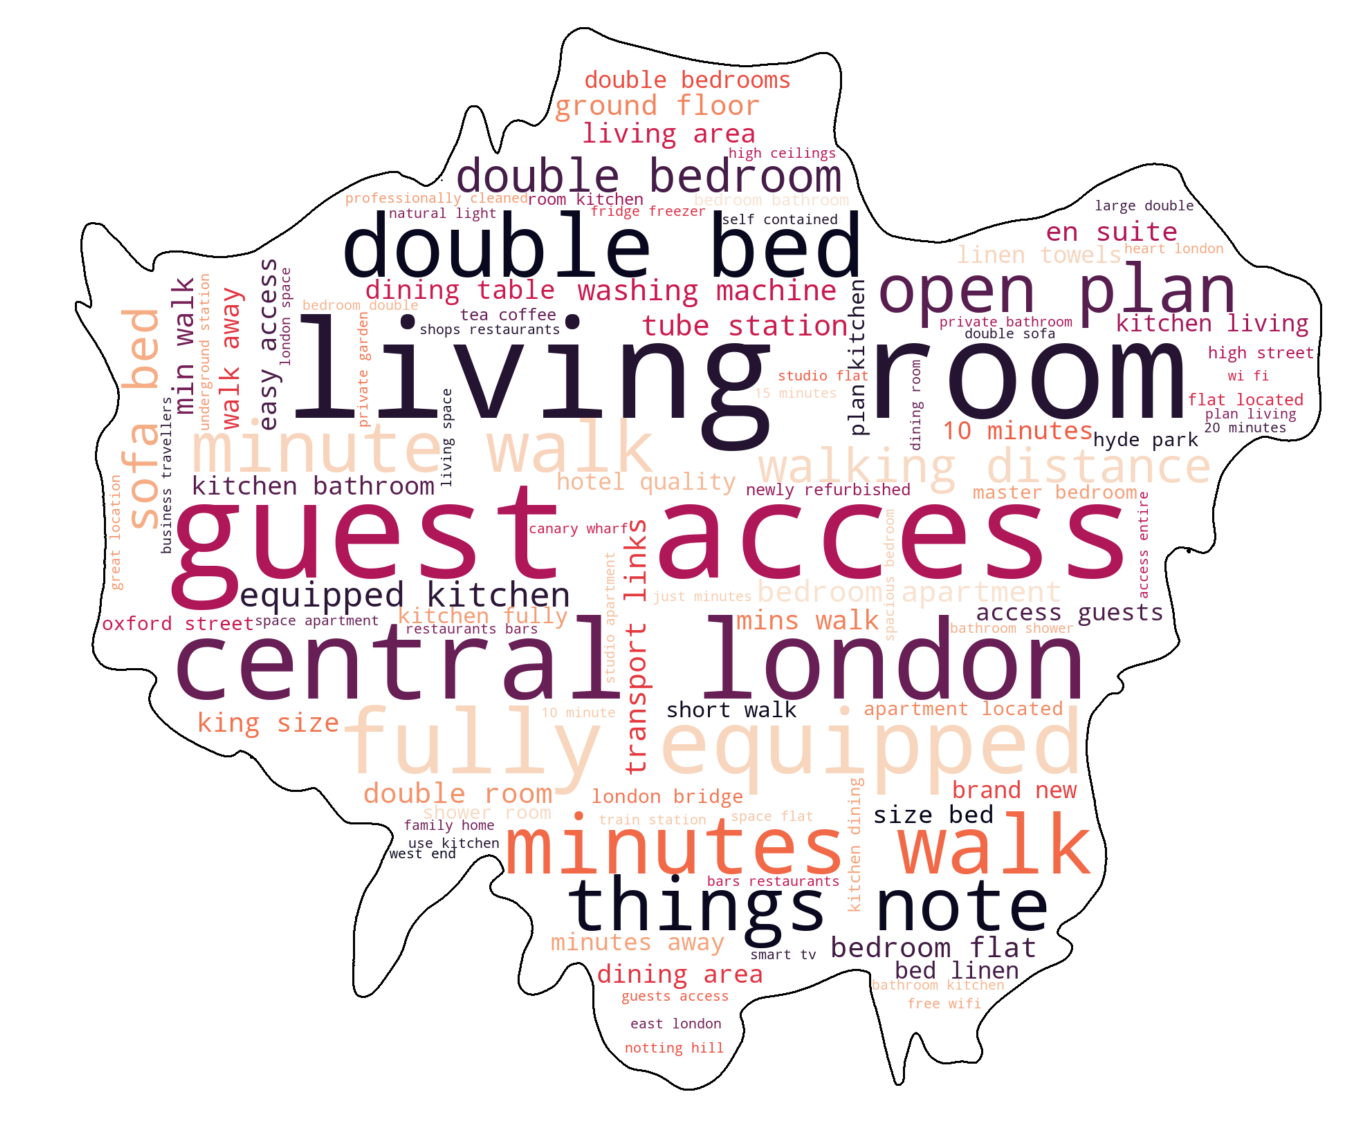

In [22]:
# create dictionary of word counts and frequencies
frequencies = dict(zip(tvec.get_feature_names(), np.array(tmat.sum(axis=0))[0]))

# create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color='white', mask=transformed_london_mask,
                      random_state=1, contour_width=3, contour_color='black', colormap='rocket').fit_words(frequencies)

# display the generated image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()